In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs

In [2]:
X,y = make_blobs(n_samples=1000,n_features=2,centers=2)

In [3]:
y[y==0] = -1

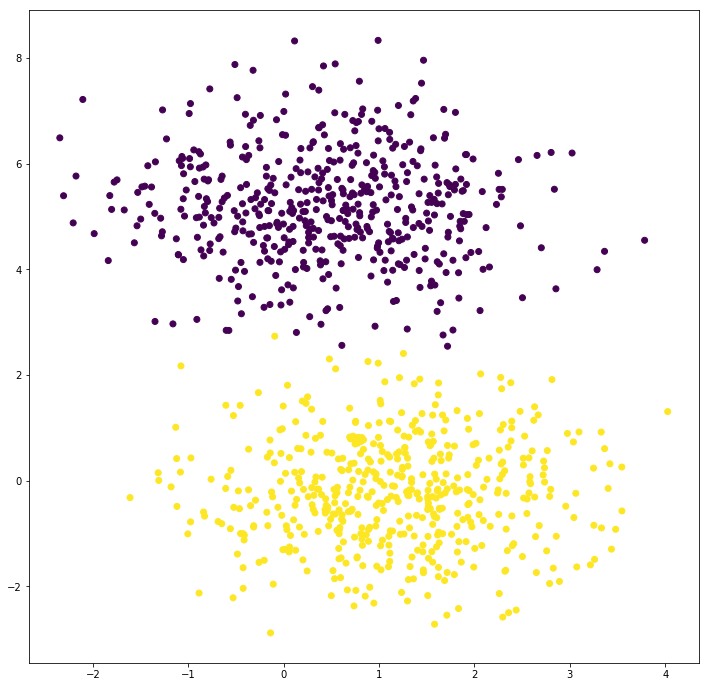

In [8]:
plt.figure(figsize=(12,12))
plt.scatter(X[:,0],X[:,1],c=y)
plt.show()

In [ ]:
class SVM:
    
    def __init__(self,c):
        self.c = c
        self.w = 0
        self.b = 0
        
    def hingeLoss(self,X,Y,w,b):
        
        loss = 0.0
        loss += 0.5*np.dot(w,w.T)
        
        for i in range(m):
            ti = Y[i]*(np.dot(w,X[i])+b)
            loss += c*max(0,1-ti)
            
    return loss

        